In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from lib import *
import scipy
import torchvision

Based on https://stackoverflow.com/questions/31528800/how-to-implement-zca-whitening-python

In [3]:
def show_image(img):
    plt.figure(figsize=(4,4));
    plt.imshow(img, cmap="gray");
    plt.axis("off");

In [4]:
train_tfms = get_transforms()

In [5]:
ds = torchvision.datasets.CIFAR10(root = "../data/", 
                                  train = True, 
                                  transform  = train_tfms, 
                                  target_transform = None, 
                                  download = False)

In [6]:
idx = 200

In [7]:
example = np.array(ds[idx][0])

In [8]:
example.shape

(784,)

In [9]:
mean, _ = get_stats(ds)

In [10]:
lambda_ = np.load("../NCE_results/precision_matrix_mask.npy")

In [11]:
lambda_.shape

(784, 784)

In [12]:
epsilon = 1e-5

In [13]:
covariance_matrix = np.linalg.inv(lambda_)

In [14]:
U,S,V = np.linalg.svd(covariance_matrix)

In [15]:
zca = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))

In [16]:
whitened = zca @ (example - mean)

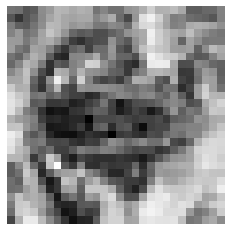

In [17]:
show_image(whitened.reshape(28,28))

In [18]:
zca.shape

(784, 784)

In [20]:
np.var(whitened)

0.6195785356987145